In [190]:
import numpy
import pandas
import matplotlib
import seaborn as sns
from scipy import stats

# Загрузка данных в датафрейм
hr_dataframe = pandas.read_csv('HR.csv', delimiter=',')
hr_dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [191]:
# Основные метрики
hr_dataframe.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [192]:
# Получение корреляционной модели и 2 метода ее визуализации

# Количественные переменные: 
#   - satisfaction_level
#   - last_evaluation
#   - number_projects
#   - average_monthly_hours
#   - time_spend_company

hr_numeric = hr_dataframe[['satisfaction_level', 
                           'last_evaluation', 'number_project', 
                           'average_montly_hours', 
                           'time_spend_company']]

corr = hr_numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

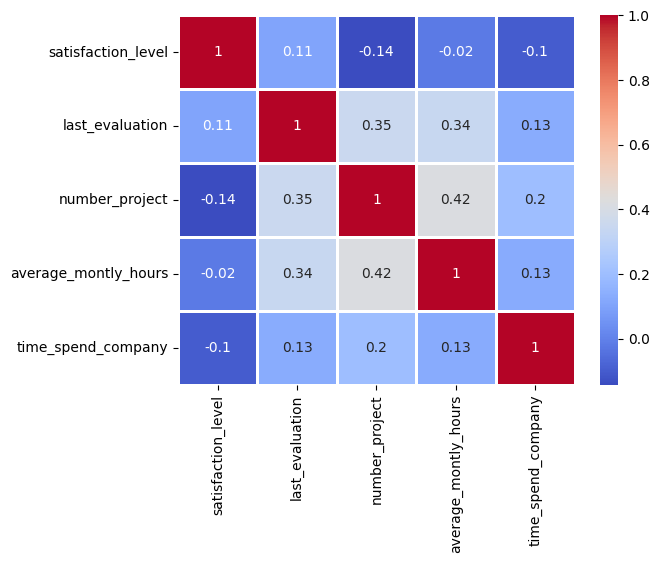

In [193]:
# или

sns.heatmap(corr,annot=True,cmap='coolwarm',linewidths=1)

In [194]:
# Сортировка пар по возрастанию и выборка двух наиболее и наименее коррелируемых

upper_corr_mat = corr.where(
    numpy.triu(numpy.ones(corr.shape), k=1).astype(bool))

unique_corr_pairs = upper_corr_mat.unstack().dropna()

sorted_mat = unique_corr_pairs.sort_values()

print('2 наименее коррелируемые пары:\n', sorted_mat[:2])
print('2 наиболее коррелируемые пары:\n', sorted_mat[-2:])

2 наименее коррелируемые пары:
 number_project      satisfaction_level   -0.142970
time_spend_company  satisfaction_level   -0.100866
dtype: float64
2 наиболее коррелируемые пары:
 number_project        last_evaluation    0.349333
average_montly_hours  number_project     0.417211
dtype: float64


In [195]:
# Количество сотрудников на каждый департамент

hr_dataframe['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

<Axes: xlabel='salary'>

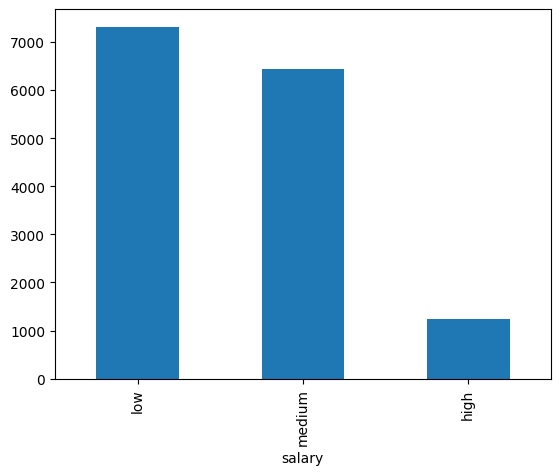

In [196]:
# Распределение сотрудников по зарплатам

salary_dist = hr_dataframe['salary'].value_counts()

salary_dist.plot(kind='bar')


<Axes: xlabel='department,salary'>

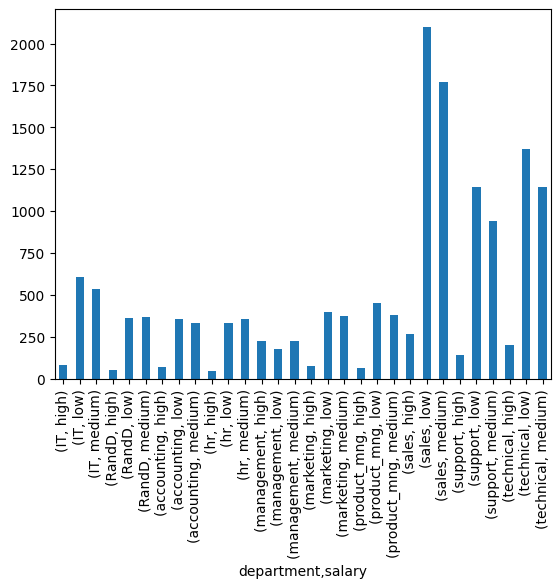

In [197]:
# Распределение сотрудников по зарплатам в каждом департаменте по отдельности

hr_dataframe.groupby(['department', 'salary'])['department'].count().plot(kind='bar')

In [198]:
# сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

dist = hr_dataframe[['average_montly_hours', 'salary']].sort_values(by='salary').groupby(['salary']).sum()
high = dist.iloc[0,0]
low = dist.iloc[1,0]

if high > low:
    print('Гипотеза подтверждена')
else:
    print('Гипотеза опровергнута')
    
dist

Гипотеза опровергнута


,average_montly_hours
salary,
high,247236
low,1470491
medium,1297827


In [233]:
# Показатели для уволившихся и не уволившихся

leftovers = hr_dataframe[['left', 'satisfaction_level', 'promotion_last_5years', 'number_project']]

all = leftovers.count()[0]

left_frame = leftovers[leftovers['left'] == 1]
nleft_frame = leftovers[leftovers['left'] == 0]
left = left_frame.count()[0]
nleft = nleft_frame.count()[0]

# Расчеты для !left

got_promoted_nl = nleft_frame[nleft_frame['promotion_last_5years'] == 1].count()[0]
ngot_promoted_nl = nleft_frame[nleft_frame['promotion_last_5years'] == 0].count()[0]
mean_satisfaction_nl = nleft_frame['satisfaction_level'].mean().__round__(2)
mean_projects_nl = nleft_frame['number_project'].mean().__round__(2)


# Расчеты для left

got_promoted_l = left_frame[left_frame['promotion_last_5years'] == 1].count()[0]
ngot_promoted_l = left_frame[left_frame['promotion_last_5years'] == 0].count()[0]
mean_satisfaction_l = left_frame['satisfaction_level'].mean().__round__(2)
mean_projects_l = left_frame['number_project'].mean().__round__(2)

print(f'Уволившиеся с повышением: {round(got_promoted_l / left * 100, 2)}%')
print(f'Уволившиеся без повышения: {round(ngot_promoted_l / left * 100, 2)}%')
print(f'Средняя степень удовлетворенности для уволившихся: {mean_satisfaction_l}')
print(f'Среднее кол-во проектов у уволившихся: {mean_projects_l}')
print()
print(f'Не уволившиеся с повышением: {round(got_promoted_nl / nleft * 100, 2)}%')
print(f'Не уволившиеся без повышения: {round(ngot_promoted_nl / nleft * 100, 2)}%')
print(f'Средняя степень удовлетворенности для не уволившихся: {mean_satisfaction_nl}')
print(f'Среднее кол-во проектов у не уволившихся: {mean_projects_nl}')

Уволившиеся с повышением: 0.53%
Уволившиеся без повышения: 99.47%
Средняя степень удовлетворенности для уволившихся: 0.44
Среднее кол-во проектов у уволившихся: 3.86

Не уволившиеся с повышением: 2.63%
Не уволившиеся без повышения: 97.37%
Средняя степень удовлетворенности для не уволившихся: 0.67
Среднее кол-во проектов у не уволившихся: 3.79
